<a href="https://colab.research.google.com/github/vishal0882/DataScience/blob/main/Copy_of_GenAI_Fashion_MNIST_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

---
**<center><h1>Generating a Clothing Line with GAN**
---

<center><img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*AkUKqdvk7WyHpZcEkycZSA.png"/></center>

----
### **Table of Content**
----

**1**. [**Introduction**](#section1)

**2**. [**Dataset Description**](#section2)

**3**. [**Importing Dependencies**](#section2)

**4**. [**Data Preprocessing**](#section3)

**5**. [**Building the Network**](#section4)

**6**. [**Training & Evaluation**](#section6)<br>

**7**. [**Conclusion**](#section7)<br>


---
# **1. Introduction**
---

- **Generative Adversarial Networks** (GANs), are an architecture for **training generative models**, such as deep convolutional neural networks for generating images.

- A GAN consists of two neural networks, the **generator** and the **discriminator**, which are trained together in a competitive manner.

<center><img src="https://c02.purpledshub.com/uploads/sites/41/2022/10/GANSpreview-tb-f1fb529.jpg?w=1175&webp=1" /></center>

- The basic idea behind GANs is to **train these two networks simultaneously**, with one network (the generator) **learning to generate data** that is similar to the real data, and the other network (the discriminator) learning to **distinguish between real and generated data**.



**<h3> Training process in GANs**

- **Initialization:** The generator and discriminator are initialized with random weights.


- **Training Loop:**In each iteration of the training loop, two main steps occur:

  **a.** **Discriminator Training (Real vs. Fake):**

  The discriminator is fed with a batch of real data from the training set and a batch of fake data generated by the generator.
  It calculates the probabilities for both real and fake data.
  The discriminator's parameters are updated using backpropagation to improve its ability to distinguish real from fake data.

 **b. Generator Training:**

  The generator takes random noise as input and generates a batch of fake data.
  The fake data is fed to the discriminator, and the discriminator's output is used as feedback.
  The generator's parameters are updated using backpropagation to minimize the probability that the discriminator assigns to the generated data being fake.

<center><img src="https://www.mathworks.com/discovery/generative-adversarial-networks/_jcr_content/mainParsys/image_copy_1544983219.adapt.full.medium.jpg/1689242946090.jpg" /></center>

- **Convergence:** The training loop continues until the GAN reaches a point where either the generator produces data that is close to the distribution of the real data, or the discriminator becomes unable to distinguish between real and fake data.


- **Generated Data Sampling:** Once trained, the generator can be used to produce new data samples that are similar to the training data. These generated samples can be used for various applications, such as image generation, text generation, and more.


- Over time, as these two networks **compete and improve**, the **generator** becomes increasingly skilled at **creating realistic data**, while the **discriminator** becomes better at **telling real data from fake data**.

**<h3> Types of GAN architectures-**

- Although GAN models are capable of generating new random plausible examples for a given dataset, there is **no way to control the types of images** that are generated other than trying to figure out the complex relationship between the latent space input to the generator and the generated images.

- The **conditional generative adversarial network** (cGAN) for short, is a type of GAN that involves the conditional generation of images by a generator model. Image generation can be **conditional on a class label**, if available, allowing the targeted generated of images of a given type.

<center><img src="https://learnopencv.com/wp-content/uploads/2021/07/Conditional-GAN-in-PyTorch-and-TensorFlow.jpeg" width=70%/></center>

- Apart from cGANs there are various **extensions** and **modifications** of Generative Adversarial Networks (GANs) have been developed **to address specific limitations or challenges** that arise when using the basic GAN architecture.

- These extensions aim to **improve stability, convergence speed, and the quality of generated samples**, and they make GANs more suitable for different applications.

- Some of these are Wasserstein GAN (WGAN), Deep Convolutional GAN (DCGAN), CycleGAN, StyleGAN etc.

| GAN Type                     | Purpose/Use Case           | Key Features                              |
| ---------------------------- | -------------------------- | ----------------------------------------- |
| Basic GAN                    | General data generation    | Generator vs. Discriminator architecture  |
| Wasserstein GAN (WGAN)       | Improved stability         | Wasserstein distance loss, Lipschitz constraint  |
| Conditional GAN (cGAN)       | Controlled generation      | Conditioning on extra information        |
| Deep Convolutional GAN (DCGAN)| Image generation           | Deep convolutional networks               |
| CycleGAN                     | Image-to-image translation | Cycle-consistency loss                    |
| Progressive GAN (ProGAN)     | High-resolution generation | Progressive resolution increase          |
| StyleGAN (StyleGAN2)         | Realistic faces            | Style vectors, highly controllable        |
| BigGAN                       | High-resolution generation | Large-scale architectures                |
| Self-Attention GAN (SAGAN)   | Capturing long-range dependencies | Self-attention mechanisms           |
| InfoGAN                      | Disentangled representations | Mutual information regularization        |
| GPT-2/GPT-3 (Not GANs, but related) | Text generation     | Transformer-based models                  |
| VAE-GAN (Variational Autoencoder GAN) | Image generation | Combines VAE and GAN approaches    |


**<h3> Applications-**

GANs have found applications in various domains, such as:

- **Image Generation**: Creating realistic images of faces, objects, or scenes.
- **Image-to-Image Translation**: Transforming images from one domain to another (e.g., turning sketches into photos).
- **Super-Resolution:** Generating high-resolution images from low-resolution inputs.
- **Style Transfer**: Applying artistic styles to images.
- **Text-to-Image Synthesis:** Generating images from textual descriptions.
- **Drug Discovery:** Generating molecular structures with desired properties.
- **Anomaly Detection:** Detecting anomalies in data by training GANs on normal data distributions.



---
# **2.** **Dataset Description-**
---

- To generate **new images** of clothing and related items, we will be using the  **Fashion MNIST**, a popular benchmark dataset used in the field of machine learning and computer vision. It was created as a more challenging and diverse dataset for tasks like image classification, object recognition, and deep learning model evaluation.

- Fashion MNIST consists of a collection of **28x28 grayscale images of various fashion items**, such as clothing and accessories. It includes a total of **10 different classes**, each representing a specific type of clothing or accessory:

 - T-shirt/top
 - Trouser
 - Pullover
 - Dress
 - Coat
 - Sandal
 - Shirt
 - Sneaker
 - Bag
 - Ankle boot

- The dataset contains **60,000 training images** and 10,000 test images, with an equal number of examples for each class. These images are preprocessed and scaled to grayscale, making them suitable for training machine learning models, especially deep neural networks.

<center><img src="https://datasets.activeloop.ai/wp-content/uploads/2022/09/Fashion-MNIST-dataset-Activeloop-Platform-visualization-image.webp" /></center>

- The main objective is to train a GAN on this dataset and try to generate new images.


---
# **3.** **Importing Dependencies-**
---

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [ ]:
#Loading the Fashion MNIST Dataset

ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.4WZE59_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.4WZE59_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
#lets check the type of our dataset
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

As it's a prefetch generator dataset, we will be able to access it using the next() function

In [ ]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [ ]:
#looks like a dictionary

ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

As the data is in a prefetch pipeline, we have to make an **iterator to fetch the data**

In [ ]:
data= ds.as_numpy_iterator()

In [ ]:
#every time we call it, it'll be different depending on the batch sie
data.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

---
# **4. Data Preprocessing**
---

Plotting to see what the images look like:

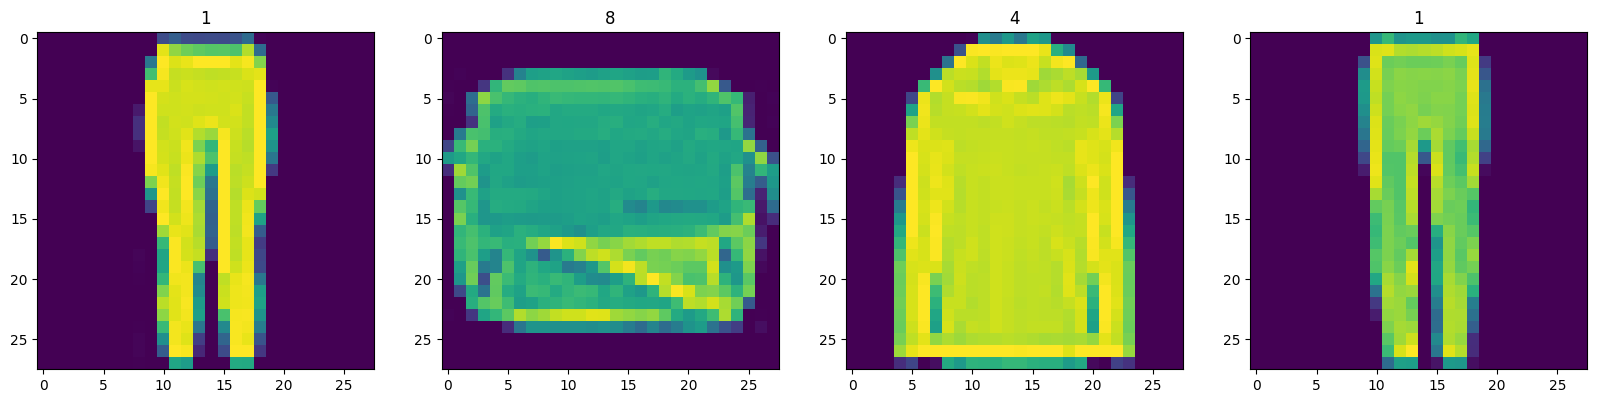

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx in range(4):
    # Grab an image and label
    sample = data.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

- So as we can see the images consists of different types of clothes and accesories like **pants, jumper, bags** etc.

In [ ]:
# Scale and return images only

def scale_images(dataset):
    image = dataset['image']
    return image / 255

- As we will be **accessing the dataset quite a lot**, it's the best option to make a **tensorflow pipeline** for all the type of image preprocessing we want to do before modelling over it.

- For building a tf pipeline, these are the steps that we follow:
  - map
  - cache
  - shuffle
  - batch
  - prefetch

- **Map:** In this step, you apply a transformation function (usually a Python function) to each element of your dataset. This allows you to **perform preprocessing, data augmentation, or any other custom operation on your data before it's used in training**. The map function is often used with tf.data.Dataset objects to perform this mapping operation.

In [ ]:
#mapping
ds= ds.map(scale_images)

- **Cache:** Caching is used to **store the elements of the dataset in memory after the map operation**. This is beneficial when you have enough memory to store your entire dataset and you want to **avoid recomputing the mapped elements during each epoch of training**. It speeds up training by eliminating redundant processing.

In [ ]:
#caching
ds= ds.cache()

- **Shuffle:** Shuffling the dataset is crucial for training **robust machine learning models**. This randomness helps **prevent the model from overfitting** to any specific order of the data.

In [ ]:
#shuffling
ds = ds.shuffle(60000)


- **Batch:** Batching involves **grouping multiple data examples together** into a batch. The **batch size is a hyperparameter that determines how many examples are processed together** in each forward and backward pass during training. Batching is essential for efficient parallel processing on GPUs or TPUs and for computing gradients with respect to multiple examples at once, which can improve training speed and stability.

In [ ]:
#batch of 128 images per sample
ds = ds.batch(128)

- **Prefetch:** Prefetching is used to **overlap data loading and model training.** Instead of waiting for the current batch of data to be fully processed before loading the next batch, prefetching allows you to load the next batch in the background while the current batch is being used for training. This can significantly reduce training time by **minimizing data loading bottlenecks**.

In [ ]:
#to prevent bottlenecks
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

---
# **5. Building the network**
---

## **Generator**

- For the generator part, we will be making a **sequential model** which returns an **output image of size 28x28x1**.
- We are using the **Dense** and **Conv2D layers** along with **LeakyReLU** as the activation function.
- You can customise it according to your data and requirements, but we've used **2 upsampling blocks** and **2 convolutional block** to build the generator model.
- The purpose of the **upsampling block in a generator**, especially in the context of a **Generative Adversarial Network (GAN)**, is to **increase the spatial resolution of the data** being generated. It's the **opposite of downsampling (pooling)**, and it involves expanding the size of the feature maps.

In [ ]:
def build_generator():
  model= Sequential()

  # Takes in random values and reshapes it to 7x7x128
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  # Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 2
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get to one channel
  model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))



  return model

In [ ]:
#initialising the generator
generator= build_generator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

**Let's plot and see how the generator works for now-**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


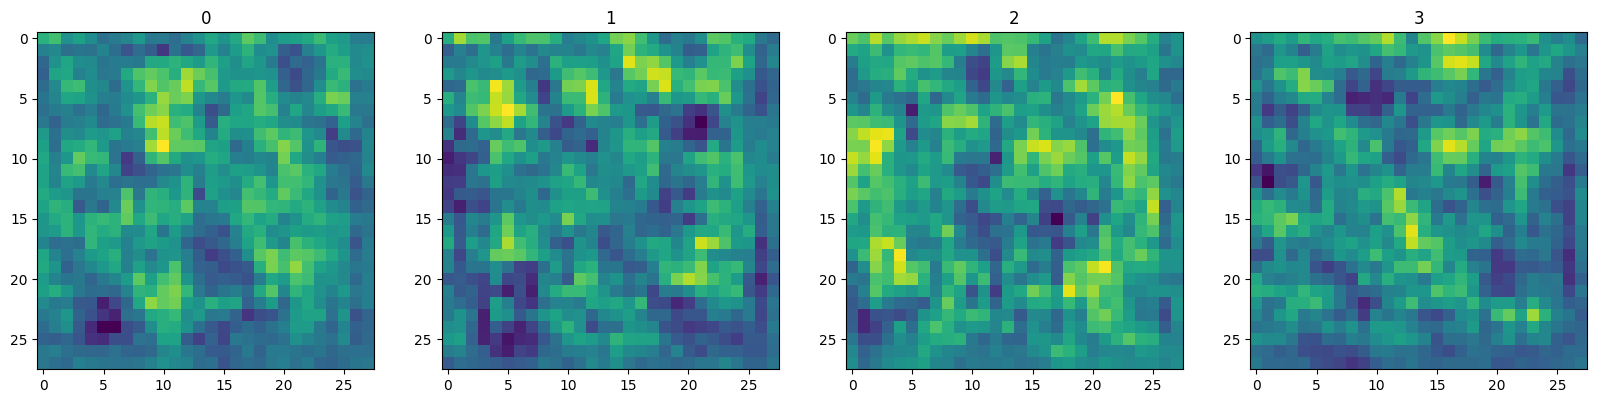

In [ ]:
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx, img in enumerate(img):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title
    ax[idx].title.set_text(idx)

## **Discriminator**
- As we will be treating the **output of generators as the input here**, the input shape will be **28x28x1**

- We are using **LeakyReLU** as the activation function here as well with the slope of 0.2 to introduce **non-linearity** while helping mitigate issues like vanishing gradients.

- There are **four convolutional blocks in this discriminator**, and in each block, the number of filters increases. This allows the discriminator to learn hierarchical features. You can build yours according to your need.

- As you can see the discriminator in a GAN typically **does not include upsampling blocks** because its primary role is to discriminate between real and fake data, not to generate or increase the resolution of data.

In [ ]:
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
discriminator= build_discriminator()
discriminator.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#taking a random image to check if the discriminator works
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


(4, 28, 28, 1)

In [ ]:
#let's see if the discriminator works
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


array([[0.50116247],
       [0.5009974 ],
       [0.5009606 ],
       [0.501116  ]], dtype=float32)

Well, **the discriminator works**, so we can finally move on to the training architecture and generate some images!

---
# **6. Training & Evaluation**
---

In [ ]:
# Adam is going to be the optimizer for both
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

In [ ]:
# Importing the base model class to subclass our training step
from keras.models import Model

In [ ]:
# Initializing Optimizers and Loss Functions

g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

- We will build a custom FashionGAN function in order to train the model. At first glance, it might seem intimidating but you'll see it's quite easy to understand.

- Like any other model, it's divided into initialization, compiling and training steps.

- **Initialization:**

  - The constructor __init__ initializes the FashionGAN class. It takes two arguments: **generator and discriminator**, which are instances of the generator and discriminator models, respectively.

  - The constructor passes any additional arguments (*args and **kwargs) to the base class (Model) constructor using super().__init__(*args, **kwargs).
  It creates attributes to store the generator and discriminator models.

- **Compilation:**

  - The compile method configures the training process for the GAN. It takes the following arguments: g_opt (**generator optimizer**), d_opt (**discriminator optimizer**), g_loss (**generator loss function**), d_loss (**discriminator loss function**), and any additional arguments passed to the base class.
  The method calls the super().compile(*args, **kwargs) to perform the base class compilation.

  - It creates attributes to store the generator and discriminator **optimizers**, as well as the generator and discriminator **loss functions**.


- **Training Step:**

  - The train_step method defines the custom training logic for one step (batch) of GAN training.

  - It takes a batch of real images (real_images) as input and generates fake images using the **generator by passing random noise** (tf.random.normal((128, 128, 1))) through the generator.

  - The method **trains the discriminator**:

    - It uses a gradient tape (tf.GradientTape) to compute gradients for the discriminator's parameters with respect to the discriminator loss (total_d_loss).

    - The discriminator is presented with both real and fake images, and the losses are calculated.

    - Some noise is added to the discriminator's output labels to improve training stability.

    - The gradients are computed, and the discriminator's trainable parameters are updated using the discriminator optimizer (self.d_opt).

  - The method then **trains the generator**:
    - Another gradient tape is used to compute gradients for the generator's parameters with respect to the generator loss (total_g_loss).

    - Fake images are generated, and the generator is presented with these images.

    - The loss is calculated based on the discriminator's predictions, effectively tricking the discriminator into classifying the generated images as real.

    - Gradients are computed, and the generator's trainable parameters are updated using the generator optimizer (self.g_opt).

  - Finally,  returns a dictionary containing the **discriminator loss (d_loss)** and the **generator loss (g_loss)** for monitoring during training.

In [ ]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    #similar to the .fit function we use
    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [ ]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

**<h3> Setting up a callback**

In [ ]:
import os
from keras.preprocessing.image import array_to_img
from keras.callbacks import Callback

In [ ]:
#making a directory to store the generated images
os.mkdir('images')

- This callback allows you to **visualize and save the progress of image generation during GAN training**.
- It's useful for observing how the quality of generated images evolves over training epochs and for **debugging** purposes.

- **Initialization:**

  The constructor __init__ initializes the ModelMonitor class with two arguments: num_img and latent_dim.
  **num_img:** The number of random images to generate and save after each epoch.
  **latent_dim:** The dimension of the latent space used to generate random vectors for image generation.


- **on_epoch_end Method:**

  - This method is called at the **end of each training epoch**.
  - Inside the method:
    - It generates random latent vectors using tf.random.uniform. The number of vectors generated is specified by self.num_img, and each vector has a dimension of self.latent_dim.

    - It passes these random latent vectors through the GAN's generator model (self.model.generator) to generate fake images.

    - The generated images are rescaled by multiplying them by 255.
    - The images are then converted to NumPy arrays using generated_images.numpy().
    - It iterates through the generated images and saves each of them as a PNG file using array_to_img and the save method. The files are saved in a directory called 'images' with filenames that include the current epoch number and the index of the image.
    

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

**<h3>Training**

In [ ]:
# Recommend 2000 epochs
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
469/469 [==============================] - 89s 163ms/step - d_loss: 0.5945 - g_loss: 0.6951
Epoch 2/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.3339 - g_loss: 1.9070
Epoch 3/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.3448 - g_loss: 5.6485
Epoch 4/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2817 - g_loss: 7.7756
Epoch 5/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2772 - g_loss: 7.2938
Epoch 6/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2751 - g_loss: 6.5675
Epoch 7/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2730 - g_loss: 5.9473
Epoch 8/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2721 - g_loss: 5.4740
Epoch 9/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2710 - g_loss: 5.0422
Epoch 10/20
469/469 [==============================] - 78s 167ms/step - d

**<h3> Performance Evaluation**

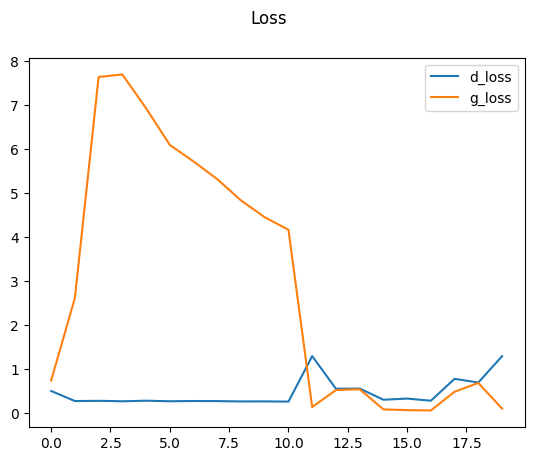

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

As you can see loss is decreasing, which shows that our model is going in the right direction. Try training it for larger number of epochs.

In [ ]:
imgs= generator.predict(tf.random.normal((16, 128, 1)))
imgs

1/1 [==============================] - 0s 92ms/step


array([[[[3.55208202e-12],
         [9.26066978e-23],
         [2.07938883e-24],
         ...,
         [5.95929362e-02],
         [1.22929050e-03],
         [2.39527412e-03]],

        [[2.11546738e-10],
         [1.92204934e-24],
         [6.46589163e-26],
         ...,
         [5.63635707e-01],
         [6.03152113e-03],
         [7.32778572e-03]],

        [[7.00615732e-10],
         [3.89225203e-26],
         [3.02743919e-27],
         ...,
         [3.87516879e-02],
         [1.02128123e-03],
         [7.23256823e-03]],

        ...,

        [[2.46043097e-09],
         [3.48570617e-11],
         [8.44871101e-05],
         ...,
         [2.79140651e-01],
         [2.21912950e-01],
         [2.28449568e-01]],

        [[1.64398280e-05],
         [4.98054874e-07],
         [2.91886914e-04],
         ...,
         [2.42300212e-01],
         [2.77515352e-01],
         [2.89422542e-01]],

        [[4.92164075e-01],
         [7.54430443e-02],
         [1.21462412e-01],
         ...,
 

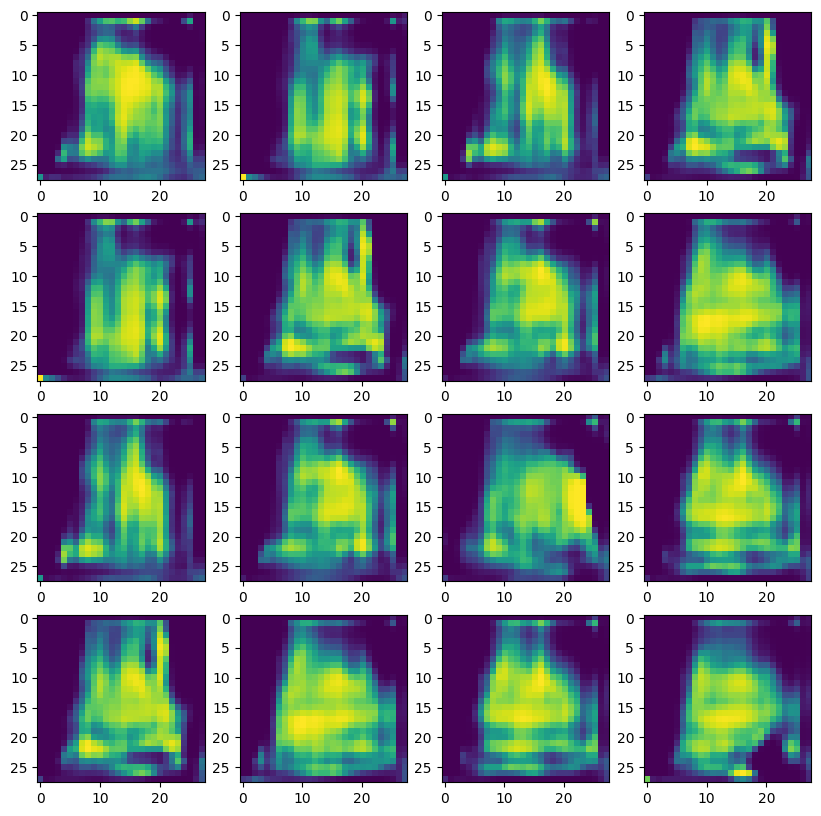

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
# You can save your weights in order to use it in the future

generator.save_weights('initial_model_weights.h5')

- **This is what your generated output images are going to look like, if the architecture is trained for more epochs.**

<center><img src="https://drive.google.com/uc?export=download&id=144OM8uDY_alBhtGFAm--1eMeOiyjAdkj" /></center>

---
# **8. Conclusion**
---

- We made a simple GAN architecture with the help of tensorflow and trained it in order to **generate new images**.

- The image generation training needs computation, therefore if you will train your model longer, it'll be able to generate **better images**.

- This was a very basic architecture with no modifications and therefore we don't have much control over what is to be generated, but you can try making a conditional GAN if that's something you want to explore.